In [1]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
lemmatizer = WordNetLemmatizer()

In [3]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [4]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [5]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [6]:
tfidf_model = TfidfVectorizer(max_features=20)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.124370,0.0,0.068809,0.120711,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.000000,0.0,0.157421,0.000000,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.000000,0.0,0.306407,0.000000,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.245634,0.0,0.135900,0.238407,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.267194,0.0,0.147828,0.259333,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


In [7]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(tfidf_df)
reduced_tfidf = pca.transform(tfidf_df)
reduced_tfidf

array([[-0.18037677,  0.31751981],
       [-0.20030223,  0.37252859],
       [-0.44485044, -0.02203862],
       ...,
       [-0.01974819,  0.33030824],
       [-0.37958428, -0.1755076 ],
       [-0.46928569, -0.02577732]])

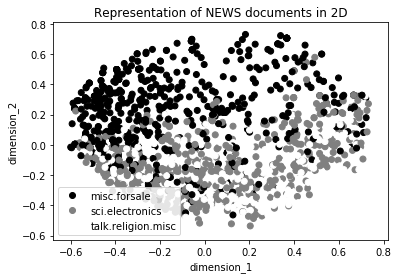

In [8]:
scatter = plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=news_data_df['category'], cmap='gray')
plt.xlabel('dimension_1')
plt.ylabel('dimension_2')
plt.legend(handles=scatter.legend_elements()[0], labels=categories, loc='lower left')
plt.title('Representation of NEWS documents in 2D')
plt.show()